# **Predicción compra de auto**

Dataset: Cars-Purchase Decision

Objetivo: 
Clasificar si una persona comprara o no un vehiculo basado en su edad, ingresos y genero. 

## 1. **Carga de datos**

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv('car_data.csv')

In [17]:
df_pruebas = df.copy() 

In [4]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [5]:
df.shape

(1000, 5)

Tenemos un dataset con 1000 registros y 5 columnas las cuales podemos ver arriba en donde mostramos los primeros 5 registros. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


Con info podemos ver que no tenemos datos nulos en ninguna variable y que solo una es de tipo object (categorica) que es la variable de genero. 

In [8]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

Cone sto corroboramos que no tenemos datos faltantes en ninguna columna. 

Antes de comenzar debemos tomar en cuenta que de neustros datos tenemos las variables dependientes y la variable independiente. En este caso la variable dependiente es *Purchased* la cual nos dice si se realizo o no se realizo la compra. REvisaremos que porcentaje de valores podemos obtener en nuestra variable dependiente y que porcentaje tenemos de cada clase.  

In [13]:
df['Purchased'].unique()

array([0, 1])

Si no se compro tendremos un 0, y si sí se realizo la compra tendremos un 1

In [16]:
df['Purchased'].value_counts(normalize=True)*100

Purchased
0    59.8
1    40.2
Name: proportion, dtype: float64

Nuestros datos no están tan desbalanceados: aproximadamente el 60% de los registros corresponden a personas que no compraron, y el 40% a personas que sí compraron. 

**Conclusión de lo que llevamos hasta ahora:**
* Se reviso la estrucutra heneral del dataset
* Se identificaron las columnas disponibles y sus tipos de datos
* Confirmamos que no existen valores faltantes en ninguna variable
* Analizamos la variable objetivo *Purchased* y observamos que el 59.8% de los registros corresponden a personas que no realizaron una compra y el 40.2% a quienes sí lo hicieron. 


## 2. Limpieza y preprocesamiento

Renombramos las columnas para que sea más facil de manejar durante el proyecto.

In [21]:
df.columns = ['id', 'gender', 'age', 'salary', 'purchased'] 

In [22]:
df.columns

Index(['id', 'gender', 'age', 'salary', 'purchased'], dtype='object')

Visualizamos distribución de la variable objetivo, aunque previamente ya vimos que no estaban tan desbalanceadas nuestras muestras. 

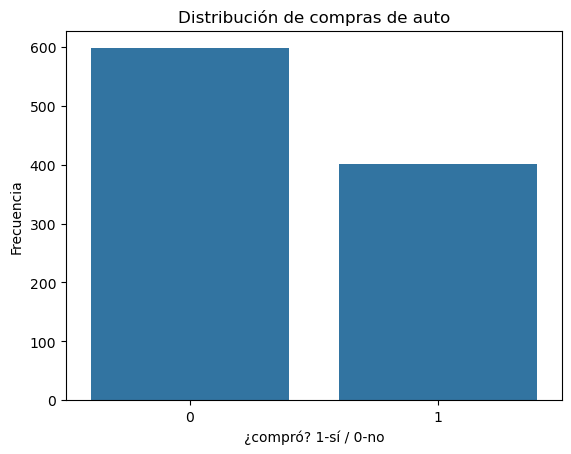

In [24]:
sns.countplot(x='purchased', data=df)
plt.title("Distribución de compras de auto")
plt.xlabel("¿compró? 1-sí / 0-no")
plt.ylabel("Frecuencia")
plt.show()

REsumen estadistico de nuestras variables numéricas

In [33]:
round(df.describe(),2)

,id,age,salary,purchased
count,1000.00,1000.00,1000.00,1000.00
mean,500.50,40.11,72689.00,0.40
std,288.82,10.71,34488.34,0.49
min,1.00,18.00,15000.00,0.00
25%,250.75,32.00,46375.00,0.00
50%,500.50,40.00,72000.00,0.00
75%,750.25,48.00,90000.00,1.00
max,1000.00,63.00,152500.00,1.00


Con la función *describe()* podemos conocer estadísticas descriptivas básicas de cada variable: el valor mínimo y máximo, el promedio (media), la desviación estandar (std), y los percentiles 25%, 50% (mediana) y 75%. Estos percentiles nos indican el valor por debajo del cual se encuentran el 25%, 50%, 75% de los datos, respectivamente. Esta información nos sirve para entender la distribución y despersión de cada variable numérica. 

Por lo tanto:
* edad 
    * va de 18 a 63 años
    * la media es de 40 

* salario
    * rango de 15,000 a 152,500. REcordemos que es salario anual. 
    * Media de $72,000
    * DEsviación estandar alta, por lo que lso sueldos varían mucho. 

En realidad la variable id no nos interesa ya que no proporciona información sobre los compradores y purchased es nuestra variable objetivo que solo contiene valores de 0 y 1 asi que tampoco nos interesa por ahora. 

Podemos crear visualizaciones para identificar más fácil outliers, verificar la distribución de los datos y decidir que tipo de escalado usar. 

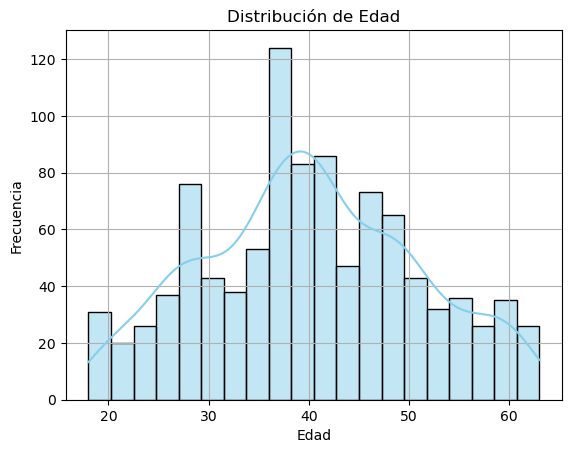

In [46]:

sns.histplot(df['age'], kde=True, bins=20, color = 'skyblue')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Con el histograma de *age* observamos una distribución aproximadamente simétrica y centrada entre los 30 a 50. La mayoría de las edades se encuentran dentro de este rango, y no se visualiza una asimetría. Por lo tanto se asemeja a una distribución normal. 

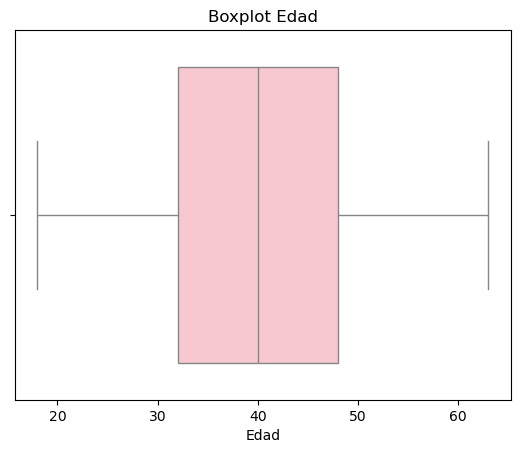

In [47]:
sns.boxplot(x=df['age'], color='pink')
plt.title("Boxplot Edad")
plt.xlabel("Edad")
plt.show()

En el boxplot podemos ver reflejados los valores que nos daba *describe*. Pero nos sirve tambien para ver que ninguno de los valores se considera como outlier dentro de la variable *age*. 

Ahora hacemos lo mismo para salario. Visualizamos la distribución y el boxplot para confirmar  que no hay outliers. 

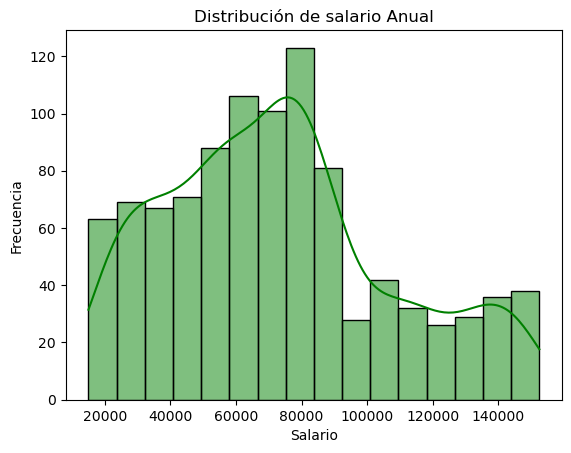

In [56]:
sns.histplot(data=df, x='salary', bins='auto', color='green', kde=True)
plt.title("Distribución de salario Anual")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.show()

La forma de la distribución no es simétrica ni en forma de campana, sino que presenta una cola hacia la derecha, lo que indica que la distribución de salario esta sesgada positivamente. Esto significa que la mayoría de las personas tiene salarios medios o bajos mientras que pocas personas tienen un sueldo mayor. 

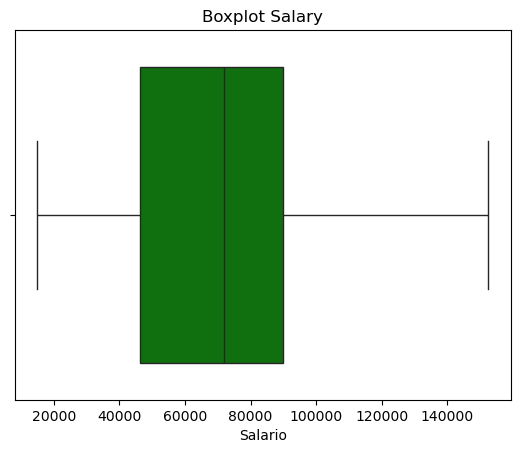

In [57]:
sns.boxplot(data=df, x='salary', color='green')
plt.title("Boxplot Salary")
plt.xlabel("Salario")
plt.show()

Con el boxplot vemos que no tenemos valores atípicos (outliers) pero en el rango del tercer cuartil y el valor máximo es visiblemente más amplio que entre q1 y el mínimo. Esto indica que hay una mayor dispersión en los salarios altos. Por lo que nuevamente podemos concluir que la distribución esta ligeramente sesgada a la derecha. 

En describe nos falto una variable, la variable *gender* la cual no fue agregada porque no es numérica (aunque se podría agregar), pero esa la vamos a revisar por separado. 

In [36]:
df['gender'].value_counts(normalize=True)*100

gender
Female    51.6
Male      48.4
Name: proportion, dtype: float64

Podemos darnos cuenta que tenemos casi un 50/50 de muestras entre hombres y mujeres en nuestro dataset. Abrá que ver si hay una diferencia en ese porcentaje en solo las paeronsas que si compraron un carro. 

In [41]:
round(df[df['purchased']== 1]['gender'].value_counts(normalize=True)*100,2)

gender
Female    54.48
Male      45.52
Name: proportion, dtype: float64

Vemos que tambien esta muy parejo en  cuanto al genero de las personas que si compraron un vehiculo. 

Antes de pasar a la creación de un modelo, recordemos que una computadora entiende números y nuestra variable gender es categorica asi que debemos convertirla. 
Como solo son dos posibles valores los que tenemos en gender podemos usar codificación binaria (0 y 1). Si fueran más de dos clases podriamos usar one.hot encoding, label encoding. 

In [58]:
df.head()

,id,gender,age,salary,purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [60]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [61]:
df_pruebas['gender'] = df_pruebas['gender'].map({'Male': 0, 'Female':1})

In [63]:
df_pruebas['gender'].unique()

array([0, 1])

VEmos que nuestro df_pruebas que no es más que una copia del df original para trabajar de forma segura, primero tenía los valores de 'Male' y 'Female' pero ahora ya solo tiene 0 y 1. 

In [75]:
df_pruebas.head()

,id,gender,age,salary,purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0


In [72]:
df.head()

,id,gender,age,salary,purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0


Vamos a eliminar la columna id porque solo sirve para identificar las filas pero no sirve para el modelo. 

In [76]:
df_pruebas.drop(columns=['id'], inplace=True)

Ya no tenemos la columna *id* asi que lo copiamos a df

In [78]:
df_pruebas.head()

,gender,age,salary,purchased
0,0,35,20000,0
1,0,40,43500,0
2,0,49,74000,0
3,0,40,107500,1
4,0,25,79000,0


In [79]:
df = df_pruebas.copy()

De las columnas que nos quedan veamos que tanta correlación tienen con nuestra variable objetivo apra saber si nos sirven. Principalmente la que tengo duda es la de gender porque como vimos hace rato tanto en los que no compraron, como los que si compraron esta casi casi en un 50/50 en cuanto a genero. 

In [80]:
correlation = df.corr()


Calculamos la correlacion entre las variables y la variable objetivo. 

In [83]:
correlation['purchased'].sort_values(ascending=True)

gender       0.047211
salary       0.364974
age          0.616036
purchased    1.000000
Name: purchased, dtype: float64

Como lo mencionamos anteriormente, gender no influye demasiado en nuestra variable objetivo. Salario si tiene una pequeña relación. y la edad es aun mucho más relacionada, por lo que a mayor edad, mayor posibilidad de compra. 

Aunque la correlación de gender es baja la vamos a mantener y veremos si hace un cambio al momento de entrenar el modelo. 

### División de variables X e y

In [86]:
X = df[['gender', 'age', 'salary']]
y = df['purchased']

Dividimos los datos en conjunto de prueba y entrenamiento y usamos stratify para asegurarnos que el conjunto de pruebas por azar se quede solo con una clase. 

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Escalamos las varibales

El escalado estandariza las variables, es decir los ajusta a una media de 0 y una desviación estandar de 1 sin quepierdan sus proporciones entre valores. 
Esto es crucial para modelos como KNN, regresión logistica, SVM.

¿Por qué usamos standarscaler?
Porque nuestras variables parecen tener una distribución normal o muy cercana. 

¿Por que escalamos los daots? 
Las edades son valores entre 18 y 63 años, mientras que los sueldos son valores desde 15000 hasta 152500. Por lo tanto las magnitudes de estas variables son muy difernetes. Esto afecta el rendimiento de los algoritmos, ya que las variables con valores más grandes pueden dominar o influir más que las de menor escala como edad. 

In [90]:
scaler = StandardScaler()

# Ajustamos y transformamos solo el set de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Usamos el mismo escaladro par atransformar el set de prueba
X_test_scaled = scaler.transform(X_test)

## Entrenamiento del modelo

In [100]:
model = LogisticRegression()

In [101]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

En este caso estamos usando regresión logistica que nos sirve para clasificación binaria. 
Es interpretable, los coeficientes nos dicen como influye cada variable. 

## Predicciones 

In [102]:
# Predicciones regresion logistica

y_pred = model.predict(X_test_scaled)


In [109]:
# Obtenemos la probabilidad de pertenencia a la clase 1 (compro)
y_proba = model.predict_proba(X_test_scaled)[:,1]

# Esto nos dara la probabilidad de cada evento de que pertenezca a la clase 1 

## Evaluamos el modelo

In [112]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.85
Precision: 0.84
Recall: 0.79
F1 Score: 0.81


¿Qué mide cada métrica?
* Accuracy: Porcentaje de predicciones correctas
* Precision: De los que se predijeron que compraban, ¿cuántos realmente lo hicieron? 
* Recall: de todos los que realmente compraron, ¿cuántos detectamos? 
* F1 Score: balance entre precisión y recall 

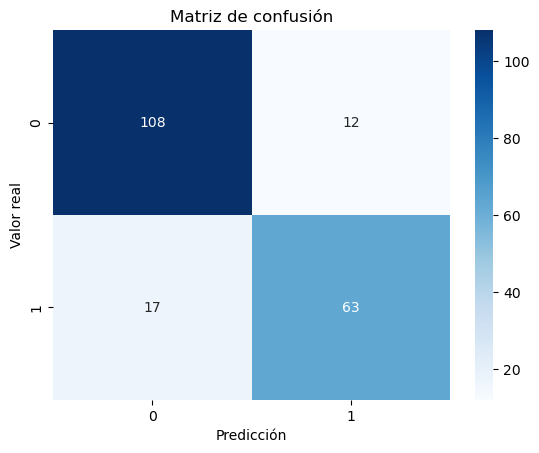

In [113]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

De la matriz de confusión podemos observar lo siguiente:

* El modelo predijo que 108 personas no comprarían y acertó. 
* El modelo predijo que 12 si comparían pero no comparon.
* Predijo que 17 si comprarían cuando no compraron. 
* Y predijo que 63 si comprarían y efectivamente si compraron. 

Por lo tanto nuestro modelo acerto 171 veces en total y se equivoco 29 veces. 

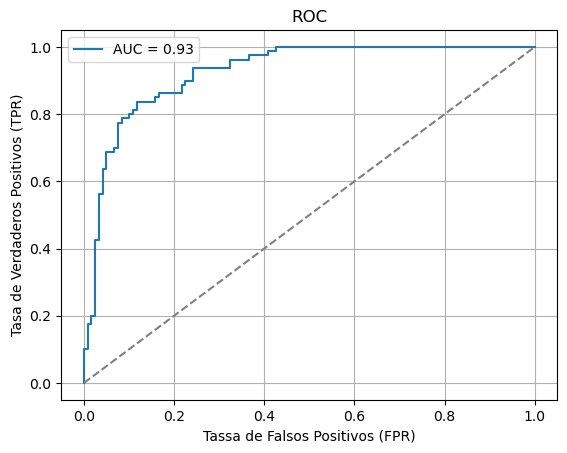

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label = f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("Tassa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("ROC")
plt.legend()
plt.grid(True)
plt.show()